In [70]:
#라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [4]:
question = pd.read_csv('./data/schema.csv')
question.shape

(290, 3)

In [5]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [9]:
#응답
#ecoding -> 한글파일이 포함될 때 사용
#low_memory = false -> 대용량 파일을 불러올 때 메모리 에러가 발생할 경우  false
mcq = pd.read_csv('./data/multipleChoiceResponses.csv' , encoding ='ISO-8859-1', low_memory =False)

In [11]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [12]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 설문통계

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

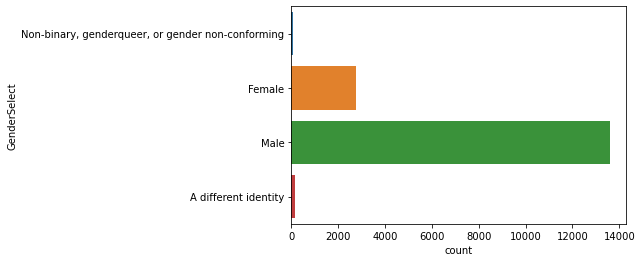

In [14]:
# 성별
sns.countplot(y='GenderSelect', data=mcq)

In [30]:
#국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df['국가'] = con_df.index
#순위를 알기위해 reset_index()해준다
#index컬럼을 삭제한다.
con_df = con_df.reset_index().drop('index',axis=1)
con_df[:15]

,Country,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [31]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

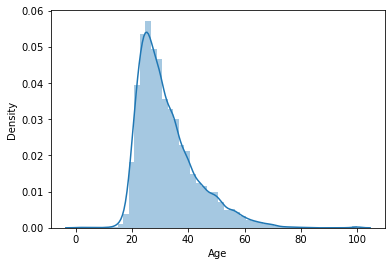

In [33]:
sns.distplot(mcq[mcq['Age']>0]['Age'])

응답자의 20대에서 30가 가장 많다. 
평균 나이는 32세이다.

## 학력

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

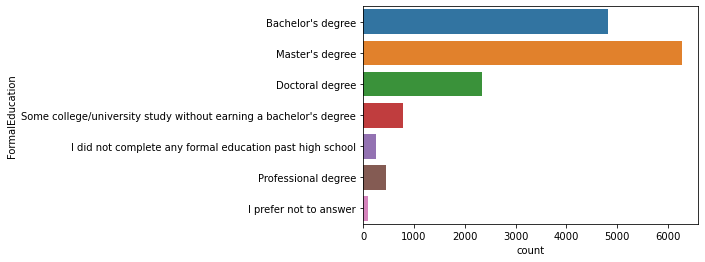

In [34]:
sns.countplot(y='FormalEducation', data=mcq)

석사학위를 가진사람이 가장 많고 그 다음이 학사 학위이다.

In [35]:
pd.DataFrame(mcq['MajorSelect'].value_counts())

,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


## 전공

In [45]:
#value_counts 를 사용하면 그룹화된 데이터의 카운트 값을 보여준다
#normalize = True를 사용하면
#해당 데이터가 전체 데이터에서 어느정도의 비율을 차지하는지 알 수 있다.
mcq_major_counts = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize= True))
mcq_major_df = mcq_major_counts.merge(
            mcq_major_percent, left_index= True,right_index =True)
mcq_major_df.columns =['응답수','비율']
mcq_major_df

,응답수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


컴퓨터 전공자들이 33%가장 많으며, 다음으로 수학,공학, 전기 공학 순이다.

<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

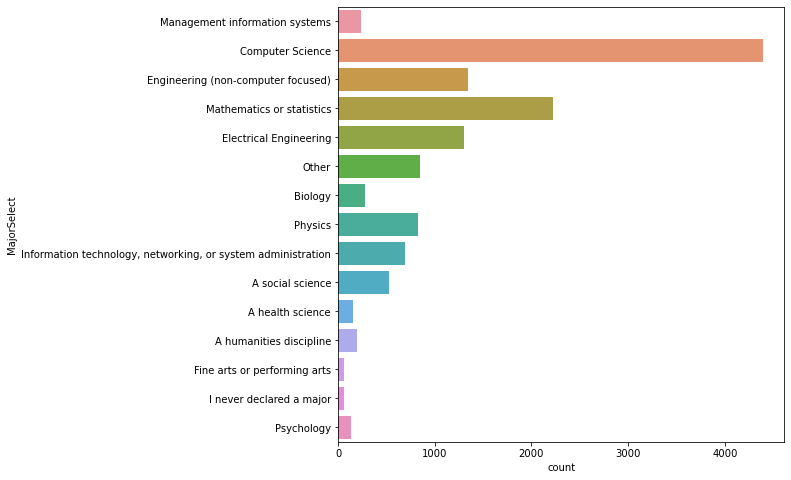

In [72]:
#재학중인 사람들의 전공 현황
plt.figure(figsize=(8,8))
sns.countplot(y='MajorSelect',data =mcq)

## 취업여부

In [60]:
# EmploymentStatus
mcq_es_counts = pd.DataFrame(
            mcq['EmploymentStatus'].value_counts())
mcq_es_percent= pd.DataFrame(
            mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_counts.merge(
            mcq_es_percent, right_index= True, left_index =True)
mcq_es_df.columns =['응답수','비율']
mcq_es_df

,응답수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

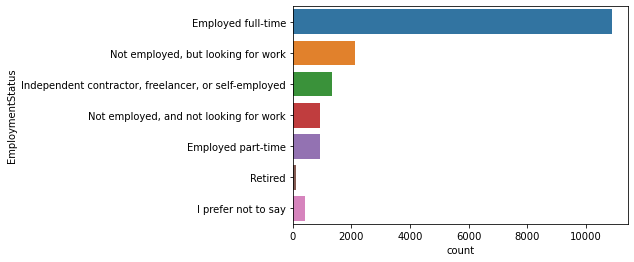

In [62]:
sns.countplot(y='EmploymentStatus',data =mcq)

응답자의 65%가 풀타임으로 일하고 있고, 그 다음 구직자가 12%이다.

## 프로그래밍 경험

'Tenure'항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다

<AxesSubplot:xlabel='count', ylabel='Tenure'>

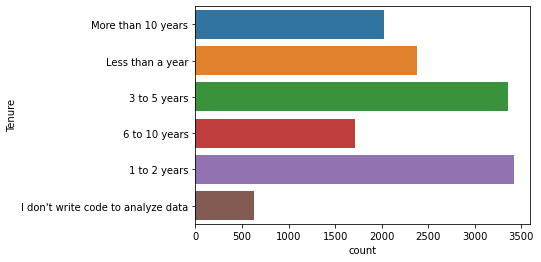

In [63]:
sns.countplot(y='Tenure',data= mcq)

The number of interviewees in Korea : 194


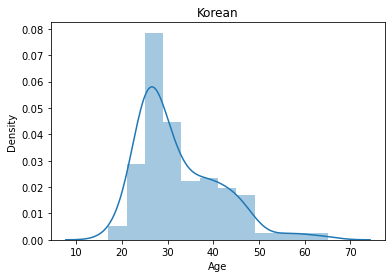

In [74]:
korea = mcq.loc[(mcq['Country']=='South Korea')]
print('The number of interviewees in Korea : '+str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [75]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

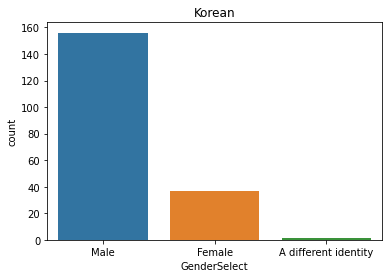

In [77]:
sns.countplot(x='GenderSelect',data= korea)
plt.title('Korean')

Text(0.5, 1.0, 'Korean Male')

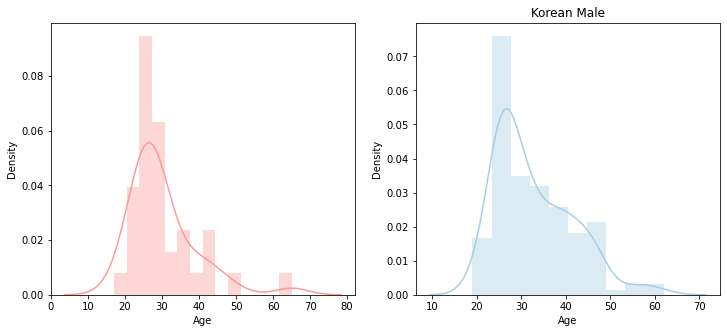

In [89]:
figure, (ax1,ax2)=plt.subplots(ncols= 2)
#박스 크기 조절 : set_size_inches
figure.set_size_inches(12,5)
#norm_hist는 정확한 의미는 모르겠다.
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist = False, color = sns.color_palette("Paired")[4], ax=ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            norm_hist= False, color=sns.color_palette('Paired')[0],ax= ax2)

plt.title("Korean Male")

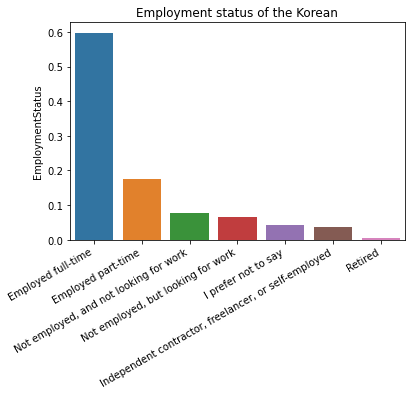

In [94]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts(normalize=True))
plt.xticks(rotation=30, ha='right')
#오른쪽으로 30도 기울여서
plt.title('Employment status of the Korean')
plt.show()

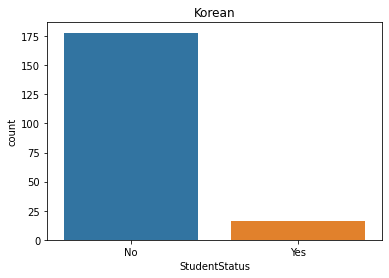

In [96]:
korea['StudentStatus']= korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('Korean')
plt.show()

In [99]:
full_time = mcq.loc[(mcq['EmploymentStatus']== 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(mcq['EmploymentStatus']=='Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)
